In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [93]:
waterlevel = pd.read_csv('./Data/BrunswickRiver_WL/wl_558007_1.csv', usecols=['OBS_TIME_LOC', 'HT'])

In [97]:
waterlevel = waterlevel.resample('30T').mean()

In [94]:
waterlevel['OBS_TIME_LOC'] = pd.to_datetime(waterlevel['OBS_TIME_LOC'])

In [106]:
waterlevel.to_csv('Durrumbul_WL.csv')

In [95]:
waterlevel.set_index("OBS_TIME_LOC", inplace=True)

In [96]:
waterlevel[waterlevel < 0] = 0

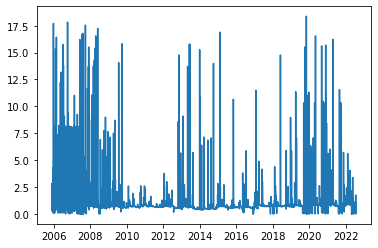

In [105]:
plt.plot(waterlevel)

In [103]:
waterlevel = waterlevel.dropna()

In [104]:
waterlevel.head()

,HT
OBS_TIME_LOC,
2005-11-26 10:00:00,0.468571
2005-11-26 12:00:00,0.670000
2005-11-26 13:00:00,0.380000
2005-11-26 14:30:00,0.670000
2005-11-26 15:00:00,0.680000


In [210]:
df = pd.read_csv('./Data/AccumsDataset.csv', usecols=['OBS_TIME_LOC', 'PRCP'])

In [211]:
df.head()

,OBS_TIME_LOC,PRCP
0,2005-11-26 11:19:50,1411.0
1,2005-11-26 11:21:18,1411.0
2,2005-11-26 14:19:51,1411.0
3,2005-11-26 17:19:51,1411.0
4,2005-11-26 17:21:18,1411.0


In [212]:
df['OBS_TIME_LOC']=pd.to_datetime(df['OBS_TIME_LOC'])

In [213]:
cf = pd.read_csv('./Data/eventDatasets.csv', usecols=['OBS_TIME_LOC', 'PRCP'])

In [214]:
cf.head()

,OBS_TIME_LOC,PRCP
0,2007-11-07 10:00:00,0.2
1,2007-11-07 11:00:00,2.8
2,2007-11-07 12:00:00,3.8
3,2007-11-07 13:00:00,7.2
4,2007-11-07 14:00:00,9.6


In [215]:
cf['OBS_TIME_LOC']=pd.to_datetime(cf['OBS_TIME_LOC'])

In [216]:
wf = pd.read_csv('./Data/riverHeightDatasets.csv', usecols=['OBS_TIME_LOC', 'HT'])

In [217]:
wf.head()

,OBS_TIME_LOC,HT
0,2005-11-26 09:51:35,1.52
1,2005-11-26 09:52:07,1.53
2,2005-11-26 09:53:07,1.52
3,2005-11-26 09:54:07,1.53
4,2005-11-26 10:09:35,1.54


In [218]:
wf['OBS_TIME_LOC'] = pd.to_datetime(wf['OBS_TIME_LOC'])

In [219]:
df = df.groupby('OBS_TIME_LOC').PRCP.mean()

In [220]:
df.head()

OBS_TIME_LOC
2005-11-26 10:00:00    10349.0
2005-11-26 10:04:24      125.0
2005-11-26 10:06:33       95.0
2005-11-26 10:16:19       26.0
2005-11-26 10:32:41     1598.0
Name: PRCP, dtype: float64

In [221]:
cf = cf.groupby('OBS_TIME_LOC').PRCP.mean()

In [222]:
cf.head()

OBS_TIME_LOC
2007-11-07 10:00:00    0.2
2007-11-07 11:00:00    2.8
2007-11-07 12:00:00    3.8
2007-11-07 13:00:00    7.2
2007-11-07 14:00:00    9.6
Name: PRCP, dtype: float64

In [223]:
wf = wf.groupby('OBS_TIME_LOC').HT.mean()

In [224]:
wf.head()

OBS_TIME_LOC
2005-11-26 09:51:35    1.52
2005-11-26 09:52:07    1.53
2005-11-26 09:52:41    0.32
2005-11-26 09:53:07    1.52
2005-11-26 09:54:07    1.53
Name: HT, dtype: float64

In [225]:
df = pd.DataFrame(df)
cf = pd.DataFrame(cf)
wf = pd.DataFrame(wf)

In [238]:
wf.head()

,HT
OBS_TIME_LOC,
2005-11-26 09:51:35,1.52
2005-11-26 09:52:07,1.53
2005-11-26 09:52:41,0.32
2005-11-26 09:53:07,1.52
2005-11-26 09:54:07,1.53


In [245]:
df_cf = pd.merge(df, cf, how='outer', on='OBS_TIME_LOC')

In [246]:
df_cf.head()

,PRCP_x,PRCP_y
OBS_TIME_LOC,,
2005-11-26 10:00:00,10349.0,NaN
2005-11-26 10:04:24,125.0,NaN
2005-11-26 10:06:33,95.0,NaN
2005-11-26 10:16:19,26.0,NaN
2005-11-26 10:32:41,1598.0,NaN


In [247]:
df_cf_wf = pd.merge(df_cf, wf, how='outer', on='OBS_TIME_LOC')

In [265]:
df_cf_wf.tail()

,PRCP_ACCUM,PRCP_RAIN,HT
OBS_TIME_LOC,,,
2022-07-31 23:48:22,385.0,0.133333,0.37
2022-07-31 23:48:33,385.0,0.133333,0.60
2022-07-31 23:52:33,385.0,0.133333,0.61
2022-07-31 23:55:27,385.0,0.133333,0.38
2022-07-31 23:56:33,385.0,0.133333,0.62


In [264]:
df_cf_wf.describe()

,PRCP_ACCUM,PRCP_RAIN,HT
count,4.670168e+06,4.670168e+06,4.670168e+06
mean,9.703048e+02,9.775200e-01,8.564567e-01
std,4.988747e+03,5.356437e+00,2.025699e+00
min,0.000000e+00,0.000000e+00,-1.570000e+01
25%,3.850000e+02,1.333333e-01,3.500000e-01
50%,3.850000e+02,1.333333e-01,6.155000e-01
75%,3.850000e+02,2.721129e-01,9.200000e-01
max,8.836600e+04,2.754000e+02,3.424650e+02


In [251]:
df_cf_wf.columns=['PRCP_ACCUM','PRCP_RAIN', 'HT']

In [261]:
df_cf_wf = df_cf_wf.dropna()

In [266]:
df_cf_wf.to_csv('Accum_Rain_HT.csv')